In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import drive

drive.mount("/content/drive")
pd.options.display.max_columns = 999

Mounted at /content/drive


In [ ]:
#sample_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/학부연구생/미세먼지_취약계층/data/S_DoT/drop_sample/drop_sample_sdot_all')
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/학부연구생/미세먼지_취약계층/data/S_DoT/data/sdot_data', index_col = 0)
#data_drop = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/학부연구생/미세먼지_취약계층/data/S_DoT/data/sdot_dropna', index_col=0)
data_date = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/학부연구생/미세먼지_취약계층/data/S_DoT/data/sdot_date', index_col=0)
location = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/학부연구생/미세먼지_취약계층/data/location/colab_(공개용)도시데이터센서(S-DoT) 환경정보 설치 위치정보_211206.csv')

In [ ]:
data_date

,시리얼,초미세먼지(㎍/㎥),미세먼지(㎍/㎥),기온(℃),상대습도( %),초미세먼지 보정(㎍/㎥),미세먼지 보정(㎍/㎥),등록일자
0,V02Q1940043,7.0,12.0,-1.4,32.0,11.0,21.0,2021-01-04
1,V02Q1940046,4.0,9.0,-1.8,38.0,6.0,15.0,2021-01-04
2,V02Q1940044,5.0,7.0,-1.5,33.0,10.0,10.0,2021-01-04
3,V02Q1940049,8.0,15.0,-1.7,33.0,11.0,19.0,2021-01-04
4,V02Q1940050,8.0,13.0,-2.6,36.0,12.0,22.0,2021-01-04
...,...,...,...,...,...,...,...,...
11223507,V02Q1941006,1.0,2.0,13.1,87.0,2.0,3.0,2022-03-13
11223508,V02Q1940950,6.0,6.0,14.0,80.0,6.0,9.0,2022-03-13
11223509,V02Q1941013,12.0,12.0,13.9,85.0,13.0,15.0,2022-03-13
11223510,V02Q1940944,8.0,8.0,14.0,81.0,8.0,11.0,2022-03-13


#결측값 버리기

In [ ]:
data.isnull().sum()

시리얼                  0
초미세먼지(㎍/㎥)       12066
미세먼지(㎍/㎥)        12066
기온(℃)            13316
상대습도( %)         13316
초미세먼지 보정(㎍/㎥)    12066
미세먼지 보정(㎍/㎥)     12066
등록일자                 0
dtype: int64

In [ ]:
data.dropna(inplace = True)
data.isnull().sum()

시리얼              0
초미세먼지(㎍/㎥)       0
미세먼지(㎍/㎥)        0
기온(℃)            0
상대습도( %)         0
초미세먼지 보정(㎍/㎥)    0
미세먼지 보정(㎍/㎥)     0
등록일자             0
dtype: int64

In [ ]:
data.shape

(11201742, 8)

#기온 데이터 수정

In [ ]:
data_drop['tem'] = data_drop['기온(℃)'].str.split('0-').str[1] # 0-을 기준으로 오른쪽 값들만 tem 컬럼에 추가
data_drop['tem'] = '-' + data_drop['tem'] # tem 컬럼에 - 추가
data_drop['tem'] = data_drop['tem'].fillna(data_drop['기온(℃)']) # tem 컬럼의 null값을 기온 값 데이터로 바꿈

data_tem = data_drop.drop(columns = ['기온(℃)']) # 기존 기온 컬럼 삭제
data_tem=data_tem[['시리얼', '초미세먼지(㎍/㎥)', '미세먼지(㎍/㎥)', 'tem', '상대습도( %)', '초미세먼지 보정(㎍/㎥)',
       '미세먼지 보정(㎍/㎥)', '등록일자']]

data_tem.rename(columns = {'tem':'기온(℃)'},inplace=True) #tem을 기온 칼럼으로 이름 수정

In [ ]:
data_tem

,시리얼,초미세먼지(㎍/㎥),미세먼지(㎍/㎥),기온(℃),상대습도( %),초미세먼지 보정(㎍/㎥),미세먼지 보정(㎍/㎥),등록일자
0,V02Q1940043,7.0,12.0,-1.4,32.0,11.0,21.0,2021-01-04 0:07
1,V02Q1940046,4.0,9.0,-1.8,38.0,6.0,15.0,2021-01-04 0:07
2,V02Q1940044,5.0,7.0,-1.5,33.0,10.0,10.0,2021-01-04 0:07
3,V02Q1940049,8.0,15.0,-1.7,33.0,11.0,19.0,2021-01-04 0:07
4,V02Q1940050,8.0,13.0,-2.6,36.0,12.0,22.0,2021-01-04 0:07
...,...,...,...,...,...,...,...,...
11223507,V02Q1941006,1.0,2.0,13.1,87.0,2.0,3.0,2022-03-13 23:07:58
11223508,V02Q1940950,6.0,6.0,14.0,80.0,6.0,9.0,2022-03-13 23:07:58
11223509,V02Q1941013,12.0,12.0,13.9,85.0,13.0,15.0,2022-03-13 23:07:58
11223510,V02Q1940944,8.0,8.0,14.0,81.0,8.0,11.0,2022-03-13 23:07:58


# 문자열을 숫자형으로 변경

In [ ]:
data_tem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11201742 entries, 0 to 11223511
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   시리얼            object
 1   초미세먼지(㎍/㎥)     object
 2   미세먼지(㎍/㎥)      object
 3   기온(℃)          object
 4   상대습도( %)       object
 5   초미세먼지 보정(㎍/㎥)  object
 6   미세먼지 보정(㎍/㎥)   object
 7   등록일자           object
dtypes: object(8)
memory usage: 769.2+ MB


In [ ]:
data_tem['초미세먼지(㎍/㎥)'] = pd.to_numeric(data_tem['초미세먼지(㎍/㎥)'], errors = 'coerce')
data_tem['미세먼지(㎍/㎥)'] = pd.to_numeric(data_tem['미세먼지(㎍/㎥)'], errors = 'coerce')
data_tem['기온(℃)'] = pd.to_numeric(data_tem['기온(℃)'], errors = 'coerce')
data_tem['상대습도( %)'] = pd.to_numeric(data_tem['상대습도( %)'], errors = 'coerce')
data_tem['초미세먼지 보정(㎍/㎥)'] = pd.to_numeric(data_tem['초미세먼지 보정(㎍/㎥)'], errors = 'coerce')
data_tem['미세먼지 보정(㎍/㎥)'] = pd.to_numeric(data_tem['미세먼지 보정(㎍/㎥)'], errors = 'coerce')

In [ ]:
data_tem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11201742 entries, 0 to 11223511
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   시리얼            object 
 1   초미세먼지(㎍/㎥)     float64
 2   미세먼지(㎍/㎥)      float64
 3   기온(℃)          float64
 4   상대습도( %)       float64
 5   초미세먼지 보정(㎍/㎥)  float64
 6   미세먼지 보정(㎍/㎥)   float64
 7   등록일자           object 
dtypes: float64(6), object(2)
memory usage: 769.2+ MB


# 등록일자를 문자열에서 datetime으로 변경

In [ ]:
data_tem['등록일자'] = data_tem['등록일자'].str[:10] # 앞 열자리만 추출(시간값을 버림)
data_tem['등록일자'] = pd.to_datetime(data_tem['등록일자'],errors = 'coerce', format='%Y-%m-%d') # 년월일로 datetime 설정

In [ ]:
data_tem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11201742 entries, 0 to 11223511
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   시리얼            object        
 1   초미세먼지(㎍/㎥)     float64       
 2   미세먼지(㎍/㎥)      float64       
 3   기온(℃)          float64       
 4   상대습도( %)       float64       
 5   초미세먼지 보정(㎍/㎥)  float64       
 6   미세먼지 보정(㎍/㎥)   float64       
 7   등록일자           datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 769.2+ MB


In [ ]:
data_tem.isnull().sum()

시리얼              0
초미세먼지(㎍/㎥)       2
미세먼지(㎍/㎥)        2
기온(℃)            2
상대습도( %)         2
초미세먼지 보정(㎍/㎥)    2
미세먼지 보정(㎍/㎥)     2
등록일자             2
dtype: int64

In [ ]:
data_tem.dropna(inplace = True)
data_tem.isnull().sum()

# irq 적용

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


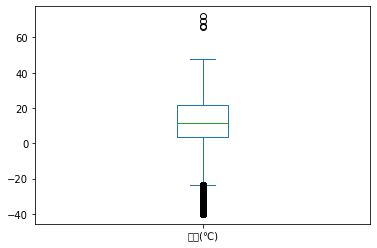

In [ ]:
data_date.plot(kind = 'box', y = '기온(℃)')

In [ ]:
tem1 = data_date['기온(℃)'].quantile(0.25) 
tem3 = data_date['기온(℃)'].quantile(0.75) 
iqr_tem = tem3- tem1 

condition_tem = (data_date['기온(℃)'] < tem1 - 1.5 * iqr_tem) | (data_date['기온(℃)'] > tem3 + 1.5 * iqr_tem) 
data_date[condition_tem].index

data_date.drop(data_date[condition_tem].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


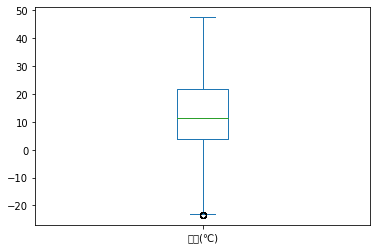

In [ ]:
data_date.plot(kind = 'box', y = '기온(℃)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_

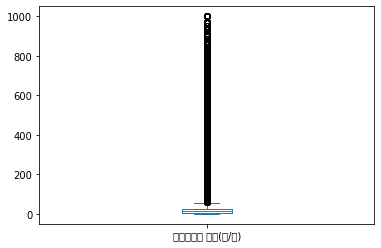

In [ ]:
data_date.plot(kind = 'box', y = '초미세먼지 보정(㎍/㎥)')

In [ ]:
s_pm1 = data_date['초미세먼지 보정(㎍/㎥)'].quantile(0.25) 
s_pm3 = data_date['초미세먼지 보정(㎍/㎥)'].quantile(0.75) 
iqr_s_pm = s_pm3- s_pm1 

condition_s_pm = (data_date['초미세먼지 보정(㎍/㎥)'] < s_pm1 - 1.5 * iqr_s_pm) | (data_date['초미세먼지 보정(㎍/㎥)'] > s_pm3 + 1.5 * iqr_s_pm) 
data_date[condition_s_pm].index

data_date.drop(data_date[condition_s_pm].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_

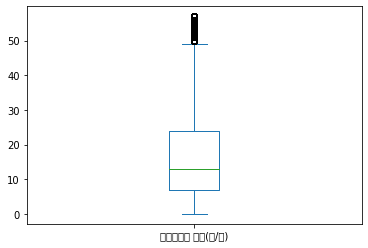

In [ ]:
data_date.plot(kind = 'box', y = '초미세먼지 보정(㎍/㎥)') # 초미세를 기준으로한 iqr 적용

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

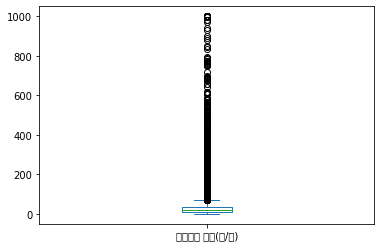

In [ ]:
data_date.plot(kind = 'box', y = '미세먼지 보정(㎍/㎥)')

In [ ]:
b_pm1 = data_date['미세먼지 보정(㎍/㎥)'].quantile(0.25) 
b_pm3 = data_date['미세먼지 보정(㎍/㎥)'].quantile(0.75) 
iqr_b_pm = b_pm3- b_pm1 

condition_b_pm = (data_date['미세먼지 보정(㎍/㎥)'] < b_pm1 - 1.5 * iqr_b_pm) | (data_date['미세먼지 보정(㎍/㎥)'] > b_pm3 + 1.5 * iqr_b_pm) 
data_date[condition_b_pm].index

data_date.drop(data_date[condition_b_pm].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

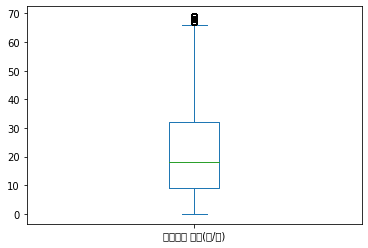

In [ ]:
data_date.plot(kind = 'box', y = '미세먼지 보정(㎍/㎥)')

In [ ]:
data_date.shape

(10306754, 8)

# sdot + location, group by

In [ ]:
df = pd.merge(data_date, location, on = '시리얼', how = 'left')

In [ ]:
df.dropna(subset = ['자치구'], inplace = True) # 자치구에 있는 결측값을 삭제
df = df.drop(columns = ['시리얼','주소', '높이', '위도', '경도']) # 필요 없는 열을 삭제

NameError: ignored

In [ ]:
def analysis(x): # 각 칼럼별 분석과 dict 구성
    a = {}
    a['PM 2.5 mean'] = x['초미세먼지 보정(㎍/㎥)'].mean()
    a['PM 2.5 max'] = x['초미세먼지 보정(㎍/㎥)'].max()
    a['PM 2.5 min'] = x['초미세먼지 보정(㎍/㎥)'].min()

    a['PM 10 mean'] = x['미세먼지 보정(㎍/㎥)'].mean()
    a['PM 10 max'] = x['미세먼지 보정(㎍/㎥)'].max()
    a['PM 10 min'] = x['미세먼지 보정(㎍/㎥)'].min()

    a['Relative humidity mean'] = x['상대습도( %)'].mean()
    a['Relative humidity max'] = x['상대습도( %)'].max()
    a['Relative humidity min'] = x['상대습도( %)'].min()

    a['temperature mean'] = x['기온(℃)'].mean()
    a['temperature max'] = x['기온(℃)'].max()
    a['temperature min'] = x['기온(℃)'].min()

    return pd.Series(a, index=['PM 2.5 mean', 'PM 2.5 max', 'PM 2.5 min',
                               'PM 10 mean', 'PM 10 max','PM 10 min',
                               'Relative humidity mean', 'Relative humidity max', 'Relative humidity min',
                               'temperature mean', 'temperature max', 'temperature min'])

In [ ]:
df_group = df.groupby(['등록일자','자치구']).apply(analysis) # 날짜와 자치구를 인덱스로 group by

In [ ]:
pd.options.display.max_rows = 100
df_group.head(100)

PM 2.5 mean  PM 2.5 max  PM 2.5 min  PM 10 mean  PM 10 max  \
등록일자       자치구                                                                 
2021-01-04 강남구      17.675305        50.0         0.0   26.483232       68.0   
           강동구      18.721795        51.0         0.0   28.183333       68.0   
           강북구      19.818363        50.0         3.0   30.475050       69.0   
           강서구      17.583062        46.0         4.0   28.780130       68.0   
           관악구      16.588119        34.0         0.0   24.522112       54.0   
           광진구      18.307992        52.0         4.0   25.803119       68.0   
           구로구      13.392430        32.0         0.0   21.583665       51.0   
           금천구      18.793522        39.0         6.0   29.927126       65.0   
           노원구      21.862423        49.0         6.0   29.817248       68.0   
           도봉구      20.996753        51.0         5.0   30.875000       69.0   
           동대문구     16.449239        40.0         2.0   25.162437       57.0   
           동작구      15.189274        37.0         0.0   24.342271       55.0   
           마포구      18.072799        47.0         0.0   26.859034       68.0   
           서대문구     16.093074        33.0         7.0   23.413420       51.0   
           서울대공원    11.142857        14.0         9.0   17.333333       21.0   
           서초구      17.568333        36.0         0.0   27.381667       61.0   
           성동구      19.445255        50.0         1.0   28.575912       69.0   
           성북구      18.862963        46.0         0.0   28.353704       67.0   
           송파구      18.032059        47.0         0.0   26.771887       69.0   
           양천구      18.383160        45.0         0.0   28.968883       67.0   
           영등포구     18.225352        50.0         0.0   28.607394       64.0   
           용산구      17.445283        33.0         0.0   29.094340       68.0   
           은평구      17.946429        39.0         3.0   26.767857       61.0   
           종로구      17.721616        38.0         0.0   25.951965       62.0   
           중구       16.574780        53.0         0.0   24.746334       69.0   
           중랑구      17.739030        47.0         0.0   28.177829       68.0   
2021-01-05 강남구       8.165450        43.0         0.0   13.508516       66.0   
           강동구       9.371197        53.0         0.0   14.438134       56.0   
           강북구       9.970480        44.0         1.0   17.664207       67.0   
           강서구       9.660167        38.0         1.0   15.434540       55.0   
           관악구       8.697819        34.0         0.0   13.079439       39.0   
           광진구       9.232932        33.0         1.0   13.771084       51.0   
           구로구       6.701681        32.0         0.0   11.457983       45.0   
           금천구      10.969697        33.0         2.0   17.679654       47.0   
           노원구       9.987552        31.0         0.0   13.838174       43.0   
           도봉구       9.304985        41.0         1.0   14.777126       61.0   
           동대문구      7.487047        22.0         0.0   12.207254       40.0   
           동작구       7.984026        35.0         0.0   13.396166       46.0   
           마포구       9.782334        38.0         0.0   16.335962       44.0   
           서대문구      7.748971        27.0         1.0   12.818930       40.0   
           서울대공원     5.111111        17.0         2.0    8.222222       26.0   
           서초구       8.452830        31.0         0.0   14.515723       59.0   
           성동구       9.685185        44.0         0.0   15.631313       69.0   
           성북구       9.186131        45.0         0.0   15.704380       59.0   
           송파구       8.203271        48.0         0.0   13.621495       67.0   
           양천구      10.193277        45.0         0.0   16.498199       64.0   
           영등포구     10.170819        30.0         0.0   16.704626       47.0   
           용산구       8.420814        41.0         0.0   16.461538       66.0   
           은평구    

In [ ]:
df_group.shape

(11145, 12)

In [ ]:
df_group.to_csv('daily_sdot.csv')